In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


#### About the data
This data is about emergency (911) calls in Montgomory County, CA from Kaggle. Montgomery is a borough in Lycoming County, Pennsylvania, United States. The population was 1,570 at the 2020 census.
This emergency calls including EMS (Emergency Medical Services), Fire, and Traffic.
Columns existed in this data:
* lat (float): Latitude
* long (float): Longitude
* desc (string): Description of Emergency
* zip (float): Zipcode
* title (string): Title of Emergency
* timestamp (string): Date and time of the call
* twp (string): Township
* addr (string): General Address
* e (int): index column, always 1

#### Get to know the data

In [4]:
#size of data
df.shape

(663522, 9)

In [5]:
#check duplicated values
df.duplicated().any()

True

In [6]:
#remove duplicate
dup = df[df.duplicated(keep = 'last')]
df = df.drop_duplicates()
print('shape of the data after removing the duplicated data: ', df.shape )

shape of the data after removing the duplicated data:  (663282, 9)


In [7]:
#check for missing values
tot = df.isnull().sum().sort_values(ascending = False)
pct = (df.isnull().sum()*100)/(df.count())
missing_values = pd.concat([tot, pct], keys = ['total', 'percentage'], axis = 1)
missing_values

total  percentage
zip        80165   13.747670
twp          293    0.044194
lat            0    0.000000
lng            0    0.000000
desc           0    0.000000
title          0    0.000000
timeStamp      0    0.000000
addr           0    0.000000
e              0    0.000000

In [8]:
#impute the missing values with the most common value of the feature
df['zip'] = df['zip'].fillna(df['zip'].value_counts().index[0])
df['twp'] = df['twp'].fillna(df['twp'].value_counts().index[0])

In [9]:
#change type of timestamp column to datatime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [10]:
#list of category column
type = df.dtypes.reset_index()
type.columns = ['feature', 'type']
col_category = list(type[type['type'] == 'object']['feature'])
col_category

['desc', 'title', 'twp', 'addr']

In [11]:
#nunique values of category column
for i in col_category:
    print(i, ': ', df[i].nunique())

desc :  663282
title :  148
twp :  68
addr :  41292


In [12]:
df['zip'] = df['zip'].astype('object')

In [13]:
#range of time of the data
print('range of time of this data is between {} and {}'.format(df['timeStamp'].min(), df['timeStamp'].max()))

range of time of this data is between 2015-12-10 14:39:21 and 2020-07-29 15:54:08


#### Create New Features
For deep dive analysis, sometimes we need to create new features. 
* First feature that we want to create is the 'reason' specified in the tittle column, so we can categorize the calls belong to what kind of reason, it can be EMS (Emergency Medical Services), traffic, or fire.
**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [14]:
#test
df['title'][0].split(':')[0]

'EMS'

In [15]:
#create reason column
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [16]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4  19401.0           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e reason  
0      REINDEER CT & DEAD END  1    EMS  
1  BRIAR PATH & WHITEMARSH LN  1    EMS  
2                    HAWS AVE  1   Fire  
3          AIRY ST & SWEDE ST  1    EMS  
4    CHERRYWOOD CT & DEAD END  1    EMS

* next, we want to extract some features from TimeStamp column such as Year, Month, Date, Day of Week, and Hour. It will be used for our analysis later

1. Year

In [17]:
#test
df['timeStamp'][0].year

2015

In [18]:
df['Year'] = df['timeStamp'].apply(lambda x: x.year)

2. Month

In [19]:
df['Month'] = df['timeStamp'].apply(lambda x: x.month)

3. Date

In [20]:
#test
df['timeStamp'][0].date()

datetime.date(2015, 12, 10)

In [21]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

4. Day of Week

In [22]:
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.weekday())

In [23]:
#create dictionary for mapping day of week to day name
dmap = {0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu', 4 : 'Fri', 5 : 'Sat', 6 : 'Sun'}

In [24]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [25]:
df['weekday'] = df['timeStamp'].apply(lambda x: x.weekday())

5. Hour

In [26]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

### Analysis

this analysis derived from my curiosity about the data and trying to find out from the data, it would be nice if you guys have another ideas that can be derived from the data


#### Univariate Analysis

In [27]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4  19401.0           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e reason  Year  Month        Date Day of Week  \
0      REINDEER CT & DEAD END  1    EMS  2015     12  2015-12-10         Thu   
1  BRIAR PATH & WHITEMARSH LN  1    EMS  2015     12  2015-12-10         Thu   
2                    HAWS AVE  1   Fire  2015     12  2015-12-10         Thu   
3          AIRY ST & SWEDE ST  1    EMS  2015     12  2015-12-10         Thu   
4    CHERRYWOOD CT & DEAD END  1    EMS  2015     12  2015-12-10         Thu   

   weekday  Hour  
0        3    17  
1        3    17  
2        3    14  
3        3    16  
4        3    16

** Map chart

In [28]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [29]:
street_map = gpd.read_file('cb_2018_us_state_20m/cb_2018_us_state_20m.shx')

In [30]:
fig,ax = plt.subplots(figsize = (100,100), dpi = 200)
street_map.plot(ax = ax)

<AxesSubplot:>

In [31]:
#plot data 911 calls
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df['lng'], df['lat'])]
geometry[:3]

In [32]:
geo_df = gpd.GeoDataFrame(data = df, 
geometry = geometry)

In [33]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

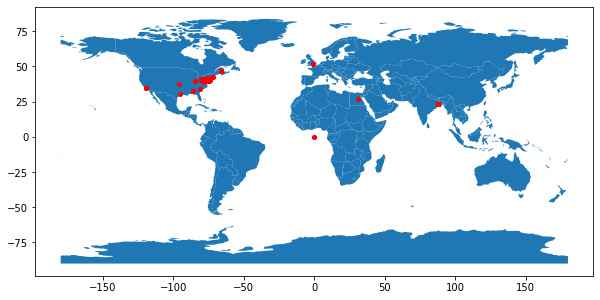

In [34]:
geo_df.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

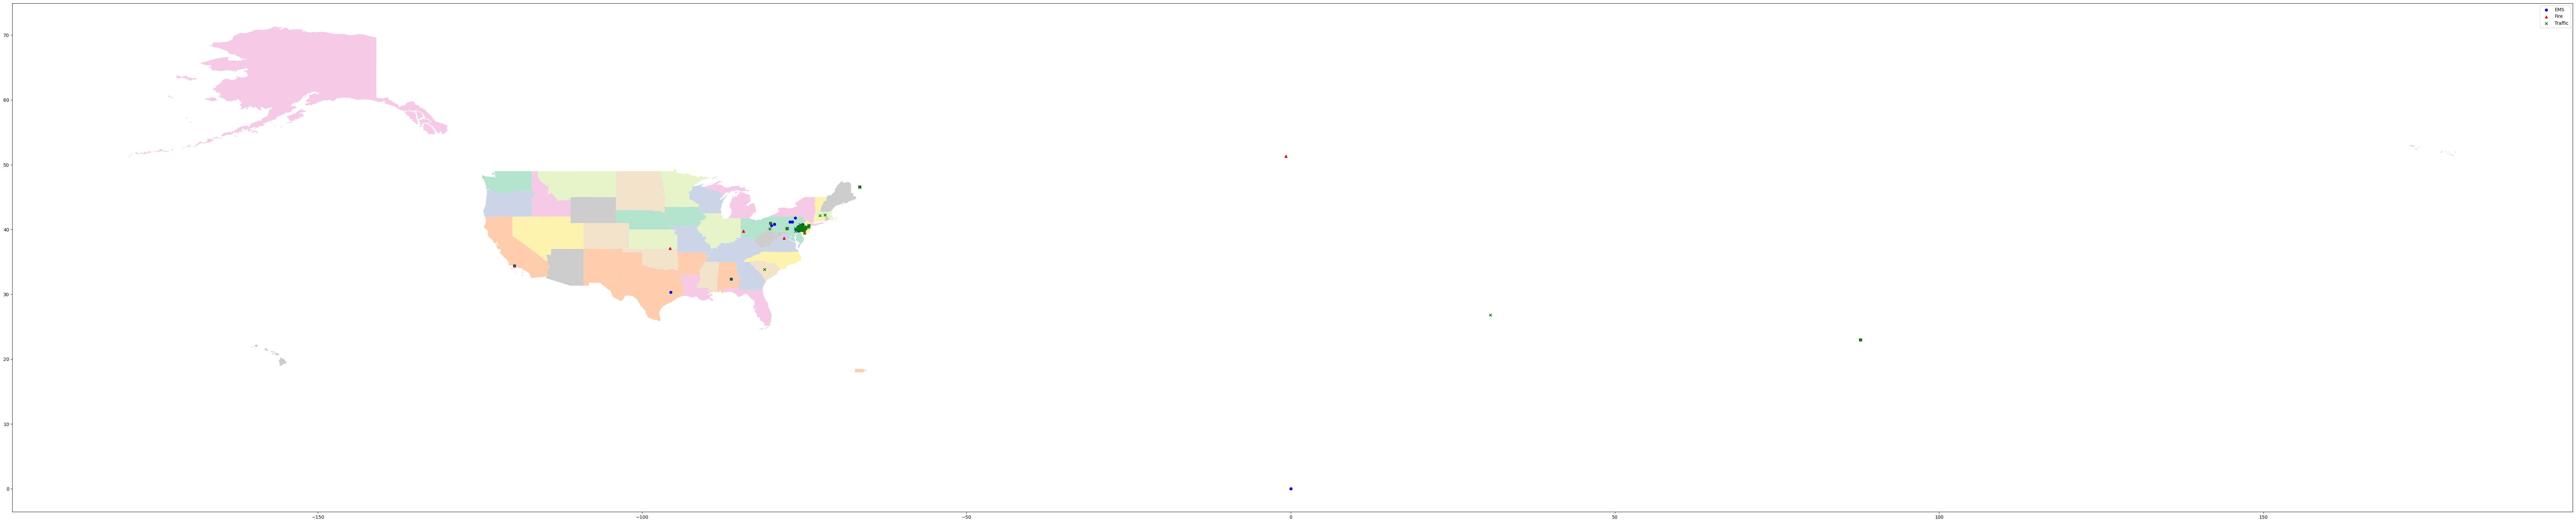

In [35]:
fig, ax = plt.subplots(figsize = (100,100), dpi = 100)
street_map.plot(ax = ax, alpha = 1, cmap = 'Pastel2')
geo_df[geo_df['reason'] == 'EMS'].plot(ax = ax, markersize = 30, color = 'blue', marker = 'o', label = 'EMS')
geo_df[geo_df['reason'] == 'Fire'].plot(ax = ax, markersize = 30, color = 'red', marker = '^', label = 'Fire')
geo_df[geo_df['reason'] == 'Traffic'].plot(ax = ax, markersize = 30, color = 'green', marker = 'x', label = 'Traffic')
plt.legend()

** How many calls by year, month, date, day of week, and hour?

first, I want to take out 2015 and 2020 data, because the data isn't full in one year

In [36]:
df_selected = df[(df['Year'] != 2015) & (df['Year'] != 2020)]

In [37]:
df_selected['Year'].unique()

array([2016, 2017, 2018, 2019])

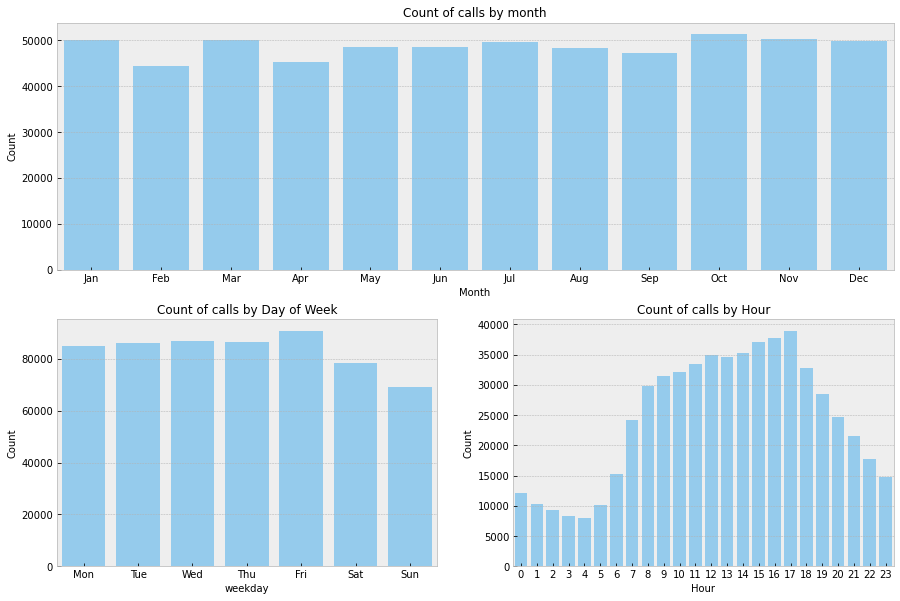

In [38]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

gs = plt.GridSpec(2,2)
pl.figure(figsize = (15,10))
plt.style.use('bmh')
ax = pl.subplot(gs[0, :])
sns.barplot(x = list(df_selected.groupby(['Month'])['Date'].count().index),y = list(df_selected.groupby(['Month'])['Date'].count().values),
data = pd.DataFrame(df_selected.groupby(['Month'])['Date']), color = 'lightskyblue', lw = 2)
plt.xticks(list(df_selected.groupby(['Month'])['Date'].count().index - 1),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month',fontsize = 10)
plt.ylabel('Count',fontsize = 10)
plt.title('Count of calls by month', loc = 'center', fontsize = 12)

ax = pl.subplot(gs[1,0])
sns.barplot(x = list(df_selected.groupby(['weekday'])['Date'].count().index), y = list(df_selected.groupby(['weekday'])['Date'].count().values),
data =  pd.DataFrame(df_selected.groupby(['weekday'])['Date']), color = 'lightskyblue', lw = 2)
plt.xticks(list(df_selected.groupby(['weekday'])['Date'].count().index), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('weekday',fontsize = 10)
plt.ylabel('Count',fontsize = 10)
plt.title('Count of calls by Day of Week', loc = 'center', fontsize = 12)

ax = pl.subplot(gs[1,1])
sns.barplot(x = list(df_selected.groupby(['Hour'])['Date'].count().index), y = list(df_selected.groupby(['Hour'])['Date'].count().values),
data =  pd.DataFrame(df_selected.groupby(['Hour'])['Date']), color = 'lightskyblue', lw = 2)
plt.xlabel('Hour',fontsize = 10)
plt.ylabel('Count',fontsize = 10)
plt.title('Count of calls by Hour', loc = 'center', fontsize = 12)

plt.show()

Text(0.5, 1.0, 'Count of calls by Date')

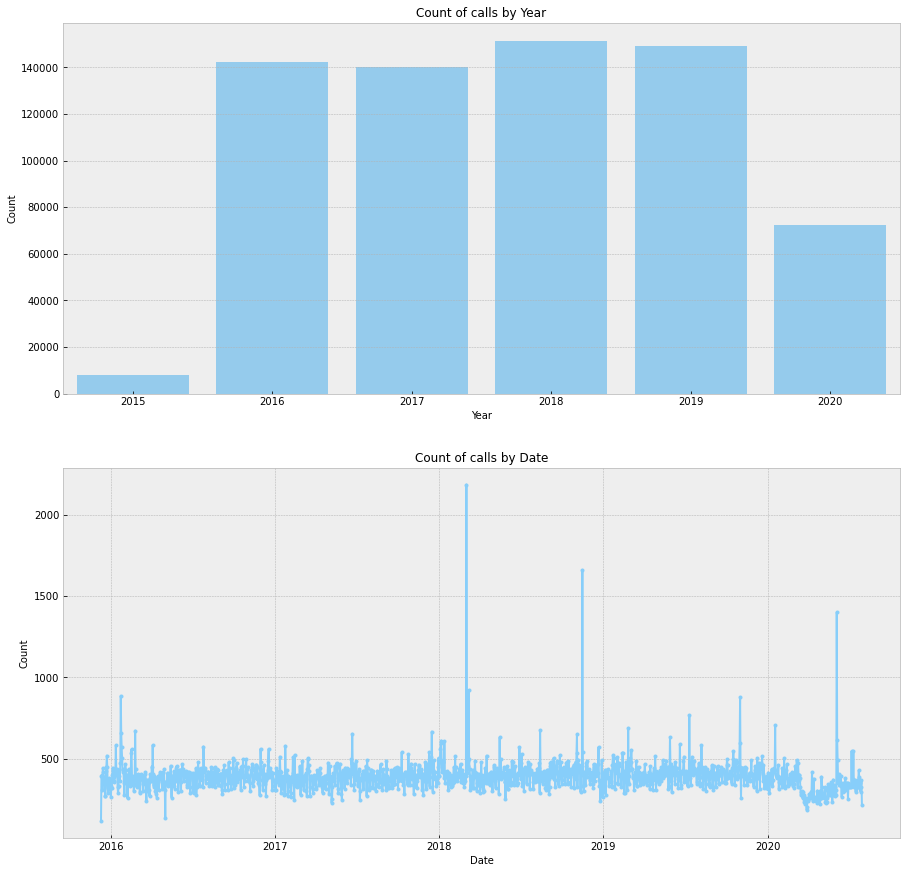

In [39]:
gs = plt.GridSpec(2,1)
plt.figure(figsize = (15,15))
plt.style.use('bmh')

ax = pl.subplot(gs[0,0])
sns.barplot(x = list(df.groupby(['Year'])['Date'].count().index), y = list(df.groupby(['Year'])['Date'].count().values),
data =  pd.DataFrame(df.groupby(['Year'])['Date']), color = 'lightskyblue', lw = 2)
#sns.countplot(x = 'Year', hue = 'Month', data = df, palette = 'viridis')
plt.xlabel('Year',fontsize = 10)
plt.ylabel('Count',fontsize = 10)
plt.title('Count of calls by Year', loc = 'center', fontsize = 12)

ax = pl.subplot(gs[1,0])
plt.plot(df.groupby(['Date'])['Date'].count().index, df.groupby(['Date'])['Date'].count().values,
 color = 'lightskyblue', marker = '.',lw = 2)
plt.xlabel('Date',fontsize = 10)
plt.ylabel('Count',fontsize = 10)
plt.title('Count of calls by Date', loc = 'center', fontsize = 12)


In [40]:
#for better plot
dt_date = df.groupby(['Date'])['timeStamp'].count().reset_index()
dt_date.columns = ['Date', 'Total']
dt_date.head()

Date  Total
0  2015-12-10    114
1  2015-12-11    391
2  2015-12-12    397
3  2015-12-13    310
4  2015-12-14    444

In [41]:
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'notebook'

fig = px.line(dt_date, x = 'Date', y = 'Total', title = 'total calls by date')
fig.show()

** top 10 zipcodes & township for 911 calls

Text(0.5, 1.0, 'top 10 township for 911 calls')

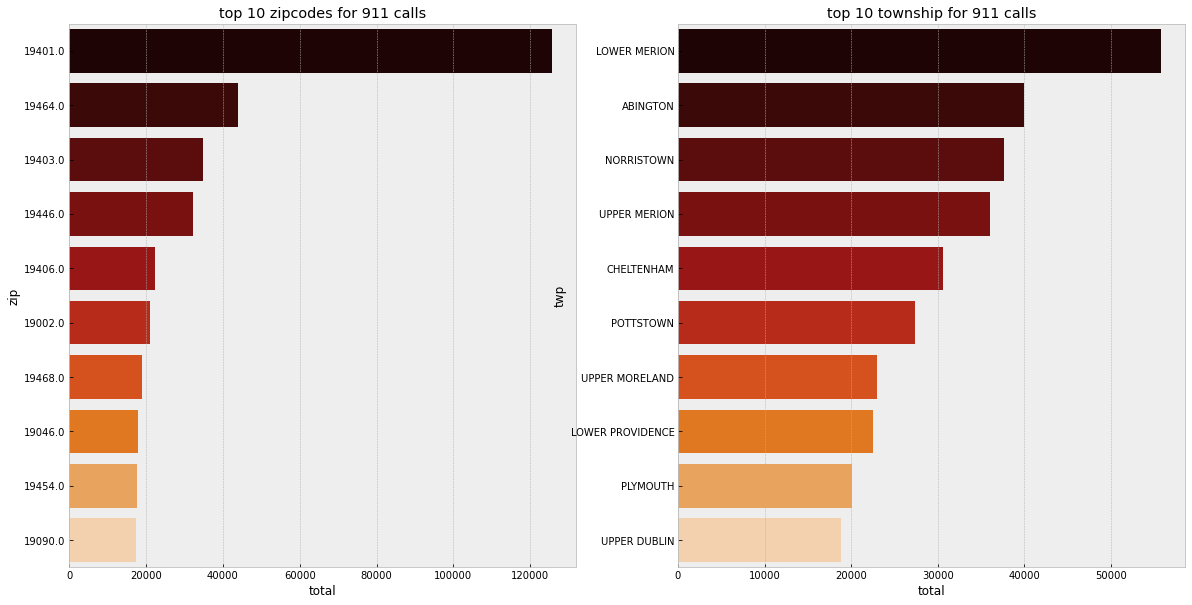

In [42]:
dt_zip = df.groupby(['zip'])['timeStamp'].count().sort_values(ascending=False).reset_index()
dt_zip.columns = ['zip', 'total']
dt_zip = dt_zip.sort_values(by = 'total', ascending = False).head(10)

dt_twp = df.groupby(['twp'])['timeStamp'].count().sort_values(ascending=False).reset_index()
dt_twp.columns = ['twp', 'total']
dt_twp = dt_twp.sort_values(by = 'total', ascending = False).head(10)

gs = plt.GridSpec(1,2)
plt.figure(figsize = (20,10))
plt.style.use('bmh')

ax = pl.subplot(gs[0,0])
sns.barplot(x = 'total', y = 'zip', data = dt_zip, orient= 'h', palette = 'gist_heat',order = dt_zip.sort_values('total', ascending = False).zip)
plt.title('top 10 zipcodes for 911 calls')

ax = pl.subplot(gs[0,1])
sns.barplot(x = 'total', y = 'twp', data = dt_twp, orient= 'h', palette = 'gist_heat',order = dt_twp.sort_values('total', ascending = False).twp)
plt.title('top 10 township for 911 calls')

zipcodes isn't really that representative, due to many missing values

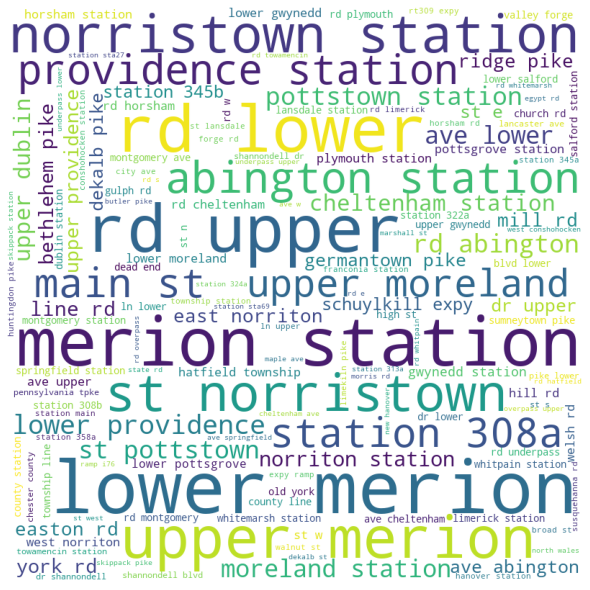

In [43]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
for val in df.desc:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

** What is the most common Reason for a 911 call

In [44]:
reason = df['reason'].value_counts()
percentage = df['reason'].value_counts()*100/df['reason'].count()
rsn = pd.concat([reason,percentage], keys = ['total', '%'], axis = 1)
rsn

total          %
EMS      332591  50.143227
Traffic  230115  34.693388
Fire     100576  15.163385

Text(0.5, 1.0, 'Total number of calls by reason')

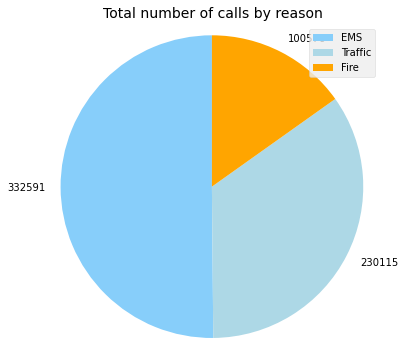

In [45]:
gs = plt.GridSpec(1,1)
plt.figure(figsize = (6,6))
plt.style.use('bmh')

ax = plt.subplot(gs[0,0])
colors = ['lightskyblue', 'lightblue', 'orange']
patches, text = plt.pie(rsn.total,colors = colors, labels = rsn['total'], startangle = 90)
plt.legend(patches, rsn.index,  fontsize = 10, loc = 'best')
plt.axis('equal')
plt.title('Total number of calls by reason', loc='Center', fontsize=14)

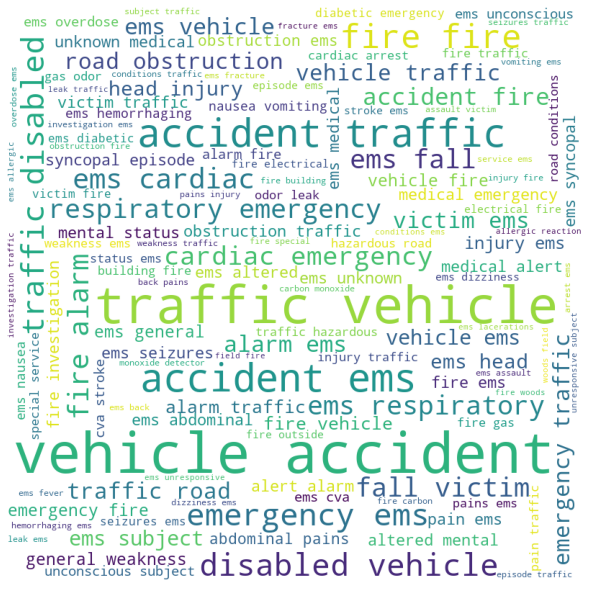

In [46]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.title:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

#### Multivariate Analysis

In [47]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4  19401.0           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e reason  Year  Month        Date Day of Week  \
0      REINDEER CT & DEAD END  1    EMS  2015     12  2015-12-10         Thu   
1  BRIAR PATH & WHITEMARSH LN  1    EMS  2015     12  2015-12-10         Thu   
2                    HAWS AVE  1   Fire  2015     12  2015-12-10         Thu   
3          AIRY ST & SWEDE ST  1    EMS  2015     12  2015-12-10         Thu   
4    CHERRYWOOD CT & DEAD END  1    EMS  2015     12  2015-12-10         Thu   

   weekday  Hour                    geometry  
0        3    17  POINT (-75.58129 40.29788)  
1        3    17  POINT (-75.26468 40.25806)  
2        3    14  POINT (-75.35198 40.12118)  
3        3    16  POINT (-75.34351 40.11615)  
4        3    16  POINT (-75.60335 40.25149)

1. Day of Week, Reason

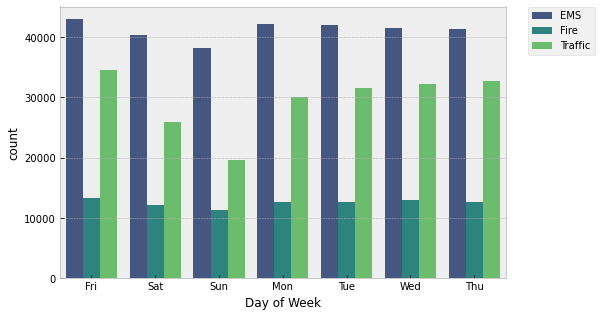

In [48]:
plt.figure(figsize = (8,5 ))
sns.countplot(x = 'Day of Week',  hue = 'reason', data = df_selected, palette = 'viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

2. Hour vs Reason

<AxesSubplot:xlabel='Hour', ylabel='count'>

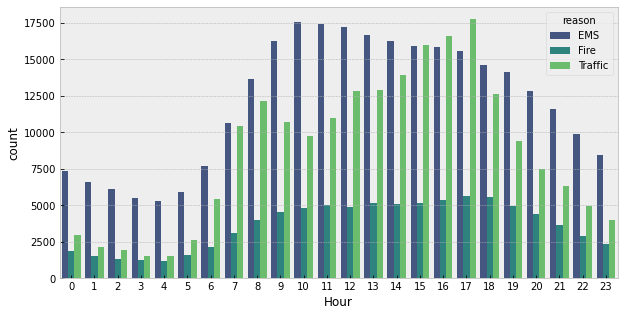

In [49]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Hour', hue = 'reason', data = df_selected, palette = 'viridis')

3. Month vs reason

<AxesSubplot:xlabel='Month', ylabel='count'>

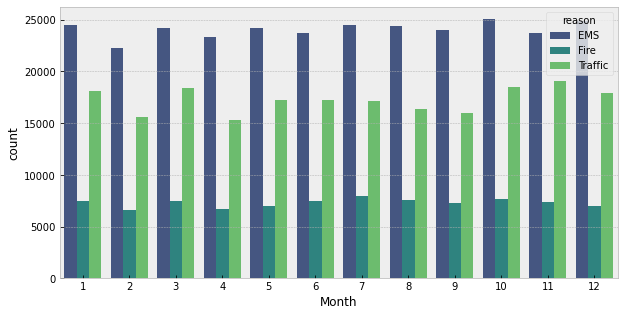

In [50]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Month', hue = 'reason', data = df_selected, palette = 'viridis')

4. Year vs reason

<AxesSubplot:xlabel='Year', ylabel='count'>

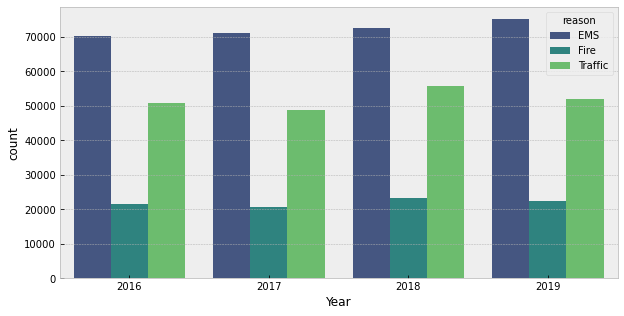

In [51]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Year', data = df_selected, hue = 'reason', palette = 'viridis')


5. Day vs Hour

In [52]:
dt_hour = df.groupby(['Day of Week', 'Hour'])['reason'].count().unstack(level = 1)
dt_hour.head()

Hour           0     1     2     3     4     5     6     7     8     9   ...  \
Day of Week                                                              ...   
Fri          1982  1634  1449  1295  1339  1638  2670  4143  5016  5288  ...   
Mon          1894  1571  1368  1272  1336  1844  2675  4430  5500  5724  ...   
Sat          2447  2059  1883  1592  1451  1580  1880  2488  3455  4313  ...   
Sun          2423  2134  1946  1613  1471  1488  1726  2408  2999  3728  ...   
Thu          1731  1406  1426  1235  1293  1775  2815  4432  5294  5410  ...   

Hour           14    15    16    17    18    19    20    21    22    23  
Day of Week                                                              
Fri          6394  7040  7064  7108  5663  5055  4373  3913  3422  2834  
Mon          5710  6287  6342  6408  5439  4487  3823  3253  2657  2071  
Sat          5419  5181  5209  5209  4974  4752  4122  3892  3225  2965  
Sun          4741  4473  4559  4500  4401  4134  3747  3160  2628  2323  
Thu          6076  6490  6375  6932  5510  4703  4040  3487  2839  2354  

[5 rows x 24 columns]

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

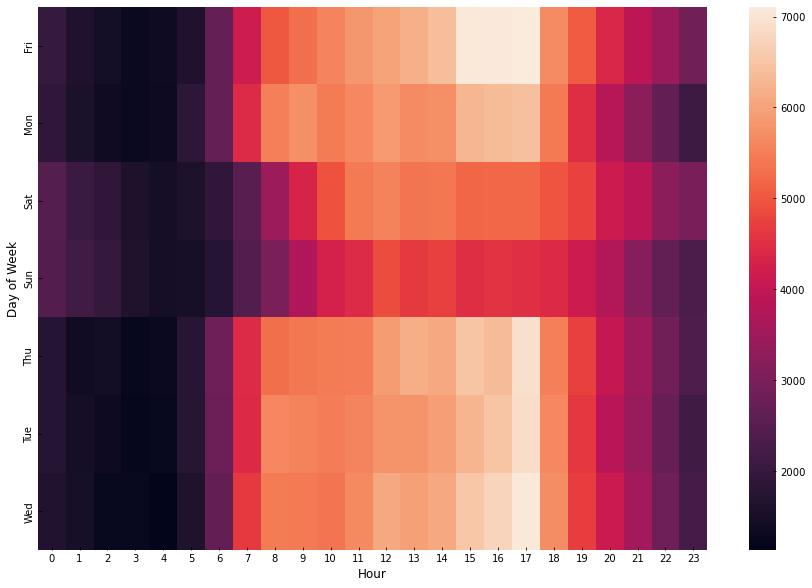

In [53]:
plt.figure(figsize = (15,10))
sns.heatmap(dt_hour)

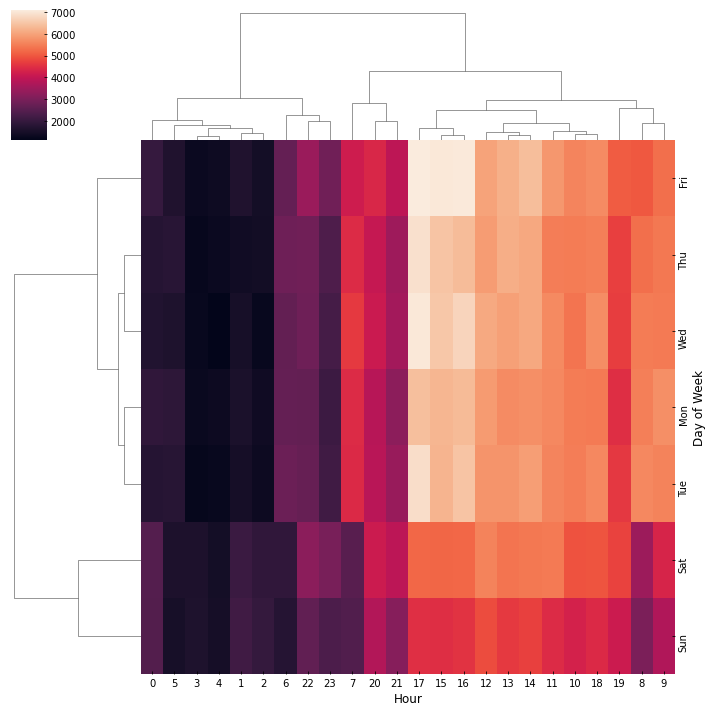

In [54]:
sns.clustermap(dt_hour)

#### Analysis for top 3 township which are LOWER MERION, ABINGTON, NORRISTOWN

when the most frequent time that the 911 calls likely to happen?

1. TWP & time

In [55]:
top_3 = ['LOWER MERION', 'ABINGTON', 'NORRISTOWN']
df_top_3 = df_selected[df_selected['twp'].isin(top_3)]

In [56]:
df_top_3['twp'].value_counts()

LOWER MERION    49800
ABINGTON        35187
NORRISTOWN      32593
Name: twp, dtype: int64

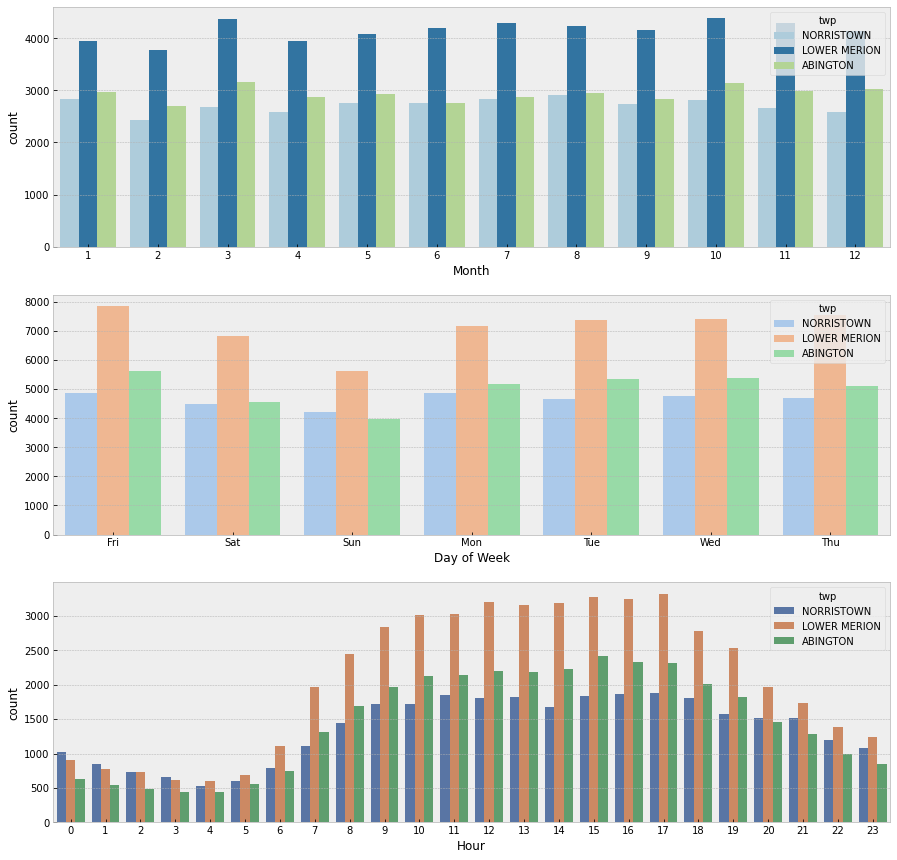

<Figure size 432x288 with 0 Axes>

In [57]:
gs = plt.GridSpec(3,1)
pl.figure(figsize = (15,15))
plt.style.use('bmh')

ax = pl.subplot(gs[0,0])
sns.countplot(x = 'Month', hue = 'twp', data = df_top_3, palette='Paired')

ax = pl.subplot(gs[1,0])
sns.countplot(x = 'Day of Week', hue = 'twp', data = df_top_3, palette = 'pastel')

ax = pl.subplot(gs[2,0])
sns.countplot(x = 'Hour', hue = 'twp', data = df_top_3, palette = 'deep')

plt.show()
plt.tight_layout()

2. TWP and reason

<AxesSubplot:xlabel='twp', ylabel='count'>

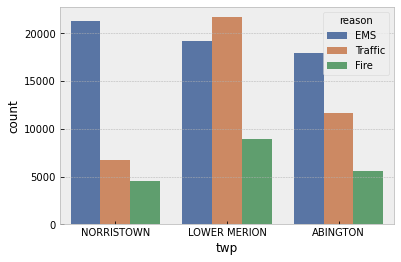

In [58]:
sns.countplot(x = 'twp', hue = 'reason', data = df_top_3, palette = 'deep')

#### Analysis for the top 3 most frequent word emerged in title -> Vehicle accident, disabled vehicle, and fire

1. VEHICLE ACCIDENT

In [59]:
term_1 = 'VEHICLE ACCIDENT'
df_term1 = df[df['title'].str.contains(term_1)]

In [60]:
df_term1.head()

lat        lng                                               desc  \
9   40.102398 -75.291458  BLUEROUTE  & RAMP I476 NB TO CHEMICAL RD; PLYM...   
10  40.231990 -75.251891  RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...   
11  40.084161 -75.308386  BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...   
12  40.174131 -75.098491  BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...   
13  40.062974 -75.135914  OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...   

        zip                        title           timeStamp             twp  \
9   19462.0  Traffic: VEHICLE ACCIDENT - 2015-12-10 17:35:41        PLYMOUTH   
10  19401.0  Traffic: VEHICLE ACCIDENT - 2015-12-10 17:33:50      MONTGOMERY   
11  19428.0  Traffic: VEHICLE ACCIDENT - 2015-12-10 16:32:10        PLYMOUTH   
12  19040.0  Traffic: VEHICLE ACCIDENT - 2015-12-10 17:15:49  UPPER MORELAND   
13  19027.0  Traffic: VEHICLE ACCIDENT - 2015-12-10 17:12:47      CHELTENHAM   

                                        addr  e   reason  Year  Month  \
9   BLUEROUTE  & RAMP I476 NB TO CHEMICAL RD  1  Traffic  2015     12   
10                     RT202 PKWY & KNAPP RD  1  Traffic  2015     12   
11                     BROOK RD & COLWELL LN  1  Traffic  2015     12   
12             BYBERRY AVE & S WARMINSTER RD  1  Traffic  2015     12   
13                   OLD YORK RD & VALLEY RD  1  Traffic  2015     12   

          Date Day of Week  weekday  Hour                    geometry  
9   2015-12-10         Thu        3    17  POINT (-75.29146 40.10240)  
10  2015-12-10         Thu        3    17  POINT (-75.25189 40.23199)  
11  2015-12-10         Thu        3    16  POINT (-75.30839 40.08416)  
12  2015-12-10         Thu        3    17  POINT (-75.09849 40.17413)  
13  2015-12-10         Thu        3    17  POINT (-75.13591 40.06297)

<AxesSubplot:xlabel='total', ylabel='twp'>

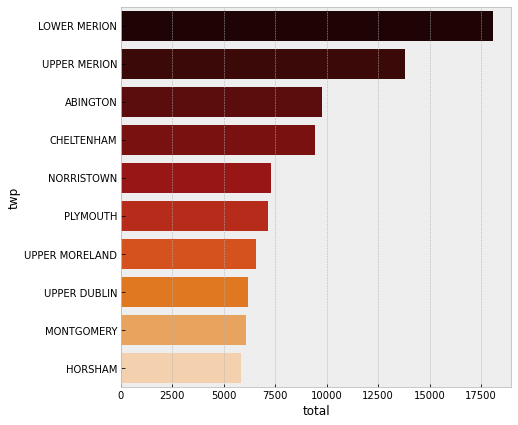

In [61]:
#top 10 township
df_term1_twp = df_term1.groupby(['twp'])['timeStamp'].count().sort_values(ascending = False).reset_index()
df_term1_twp.columns = ['twp', 'total']
df_term1_twp = df_term1_twp.sort_values(by = 'total', ascending = False).head(10)

plt.figure(figsize = (7,7))
sns.barplot(x = 'total', y = 'twp', data = df_term1_twp, orient = 'h', palette = 'gist_heat')

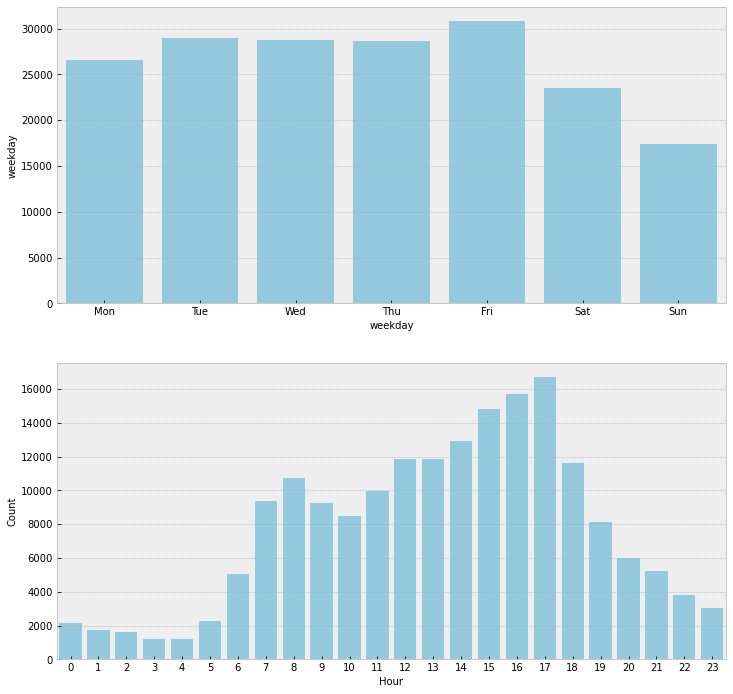

In [62]:
#time likely the accident happened
gs = plt.GridSpec(2,1)
plt.figure(figsize = (12,12))
plt.style.use('bmh')

ax = pl.subplot(gs[0,0])
sns.barplot(x = list(df_term1.groupby(['weekday'])['Date'].count().index), y = list(df_term1.groupby(['weekday'])['Date'].count().values),
data = pd.DataFrame(df_term1.groupby(['weekday'])['Date']), lw = 2, color = 'skyblue')
plt.xticks(list(df_term1.groupby(['weekday'])['Date'].count().index), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('weekday', fontsize = 10)
plt.ylabel('weekday', fontsize = 10)

ax = pl.subplot(gs[1,0])
sns.barplot(x = list(df_term1.groupby(['Hour'])['Date'].count().index), y = list(df_term1.groupby(['Hour'])['Date'].count().values),
data =  pd.DataFrame(df_term1.groupby(['Hour'])['Date']), lw = 2, color = 'skyblue')
plt.xlabel('Hour',fontsize = 10)
plt.ylabel('Count',fontsize = 10)

plt.show()

2. DISABLED VEHICLE

In [63]:
term2 = 'DISABLED VEHICLE'
df_term2 = df[df['title'].str.contains(term2)]
df_term2.head()

lat        lng                                               desc  \
19  40.209337 -75.135266  COUNTY LINE RD & WILLOW DR; HORSHAM; 2015-12-1...   
21  40.117948 -75.209848  CHURCH RD & REDCOAT DR; WHITEMARSH; 2015-12-10...   
23  40.143326 -75.422819  RT422  & PAWLINGS RD OVERPASS; LOWER PROVIDENC...   
29  40.209337 -75.135266  COUNTY LINE RD & WILLOW DR; HORSHAM; 2015-12-1...   
34  40.221227 -75.288737  MORRIS RD & MUHLENBURG DR; UPPER GWYNEDD; 2015...   

        zip                        title           timeStamp  \
19  18974.0  Traffic: DISABLED VEHICLE - 2015-12-10 17:45:23   
21  19031.0  Traffic: DISABLED VEHICLE - 2015-12-10 17:53:22   
23  19401.0  Traffic: DISABLED VEHICLE - 2015-12-10 18:00:38   
29  18974.0  Traffic: DISABLED VEHICLE - 2015-12-10 18:10:40   
34  19401.0  Traffic: DISABLED VEHICLE - 2015-12-10 18:23:13   

                 twp                           addr  e   reason  Year  Month  \
19           HORSHAM     COUNTY LINE RD & WILLOW DR  1  Traffic  2015     12   
21        WHITEMARSH         CHURCH RD & REDCOAT DR  1  Traffic  2015     12   
23  LOWER PROVIDENCE  RT422  & PAWLINGS RD OVERPASS  1  Traffic  2015     12   
29           HORSHAM     COUNTY LINE RD & WILLOW DR  1  Traffic  2015     12   
34     UPPER GWYNEDD      MORRIS RD & MUHLENBURG DR  1  Traffic  2015     12   

          Date Day of Week  weekday  Hour                    geometry  
19  2015-12-10         Thu        3    17  POINT (-75.13527 40.20934)  
21  2015-12-10         Thu        3    17  POINT (-75.20985 40.11795)  
23  2015-12-10         Thu        3    18  POINT (-75.42282 40.14333)  
29  2015-12-10         Thu        3    18  POINT (-75.13527 40.20934)  
34  2015-12-10         Thu        3    18  POINT (-75.28874 40.22123)

<AxesSubplot:xlabel='total', ylabel='twp'>

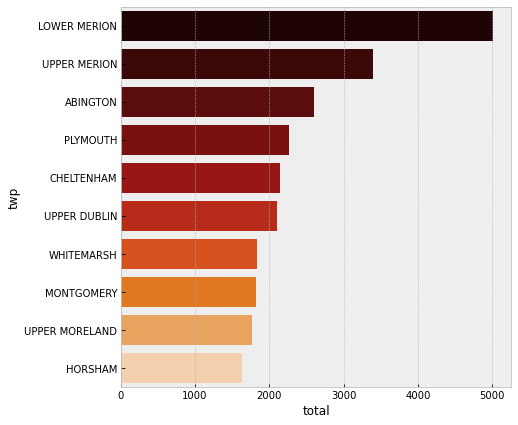

In [64]:
#top 10 township
df_term2_twp = df_term2.groupby(['twp'])['timeStamp'].count().sort_values(ascending = False).reset_index()
df_term2_twp.columns = ['twp', 'total']
df_term2_twp = df_term2_twp.sort_values(by = 'total', ascending = False).head(10)

plt.figure(figsize = (7,7))
sns.barplot(x = 'total', y = 'twp', data = df_term2_twp, orient = 'h', palette = 'gist_heat')

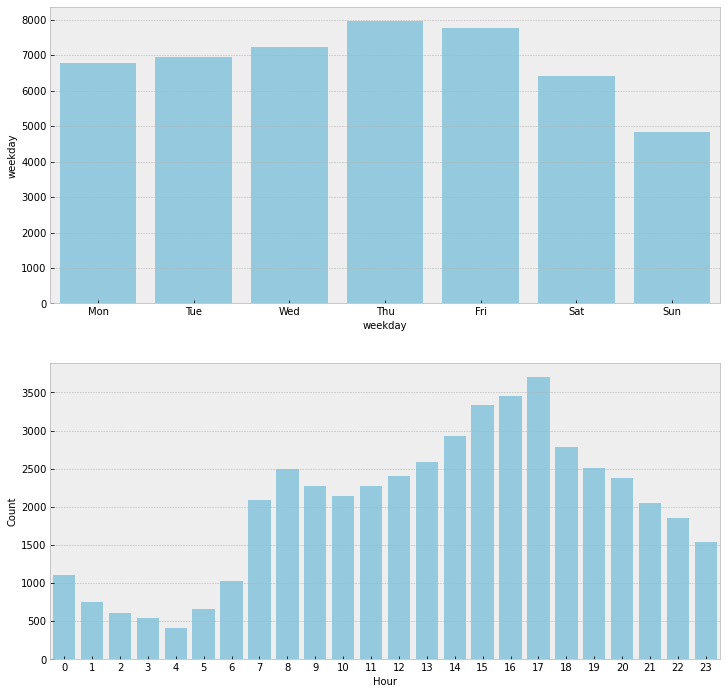

In [65]:
#time likely the accident happened
gs = plt.GridSpec(2,1)
plt.figure(figsize = (12,12))
plt.style.use('bmh')

ax = pl.subplot(gs[0,0])
sns.barplot(x = list(df_term2.groupby(['weekday'])['Date'].count().index), y = list(df_term2.groupby(['weekday'])['Date'].count().values),
data = pd.DataFrame(df_term2.groupby(['weekday'])['Date']), lw = 2, color = 'skyblue')
plt.xticks(list(df_term2.groupby(['weekday'])['Date'].count().index), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('weekday', fontsize = 10)
plt.ylabel('weekday', fontsize = 10)

ax = pl.subplot(gs[1,0])
sns.barplot(x = list(df_term2.groupby(['Hour'])['Date'].count().index), y = list(df_term2.groupby(['Hour'])['Date'].count().values),
data =  pd.DataFrame(df_term2.groupby(['Hour'])['Date']), lw = 2, color = 'skyblue')
plt.xlabel('Hour',fontsize = 10)
plt.ylabel('Count',fontsize = 10)

plt.show()

3. Fire

In [66]:
term3 = ['FIRE', 'Fire']
df_term3 = df[df['title'].str.contains('|'.join(term3))]
df_term3.head()

lat        lng                                               desc  \
2   40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
22  40.199006 -75.300058  LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...   
27  40.028903 -75.351822  EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...   
39  40.104206 -75.367665  HAMPTON RD & BELMONT RD; UPPER MERION; 2015-12...   
45  40.224923 -75.528045  LINFIELD TRAPPE RD; LIMERICK; 2015-12-10 @ 18:...   

        zip                           title           timeStamp  \
2   19401.0             Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21   
22  19446.0            Fire: APPLIANCE FIRE 2015-12-10 17:59:24   
27  19085.0  Fire: CARBON MONOXIDE DETECTOR 2015-12-10 18:05:19   
39  19406.0             Fire: GAS-ODOR/LEAK 2015-12-10 18:32:25   
45  19468.0          Fire: VEHICLE ACCIDENT 2015-12-10 18:50:23   

                twp                     addr  e reason  Year  Month  \
2        NORRISTOWN                 HAWS AVE  1   Fire  2015     12   
22    UPPER GWYNEDD   LILAC CT & PRIMROSE DR  1   Fire  2015     12   
27  DELAWARE COUNTY   EDENTON PL & DURHAM DR  1   Fire  2015     12   
39     UPPER MERION  HAMPTON RD & BELMONT RD  1   Fire  2015     12   
45         LIMERICK       LINFIELD TRAPPE RD  1   Fire  2015     12   

          Date Day of Week  weekday  Hour                    geometry  
2   2015-12-10         Thu        3    14  POINT (-75.35198 40.12118)  
22  2015-12-10         Thu        3    17  POINT (-75.30006 40.19901)  
27  2015-12-10         Thu        3    18  POINT (-75.35182 40.02890)  
39  2015-12-10         Thu        3    18  POINT (-75.36767 40.10421)  
45  2015-12-10         Thu        3    18  POINT (-75.52804 40.22492)

<AxesSubplot:xlabel='total', ylabel='twp'>

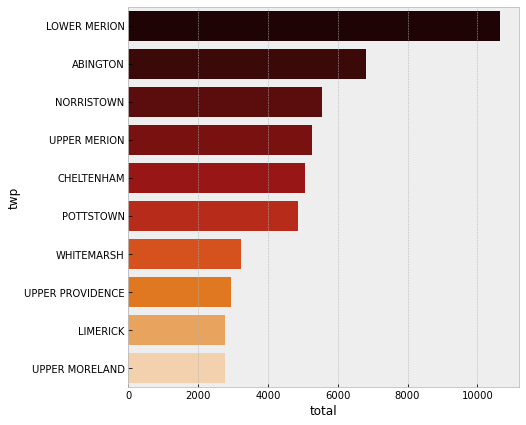

In [67]:
#top 10 township
df_term3_twp = df_term3.groupby(['twp'])['timeStamp'].count().sort_values(ascending = False).reset_index()
df_term3_twp.columns = ['twp', 'total']
df_term3_twp = df_term3_twp.sort_values(by = 'total', ascending = False).head(10)

plt.figure(figsize = (7,7))
sns.barplot(x = 'total', y = 'twp', data = df_term3_twp, orient = 'h', palette = 'gist_heat')

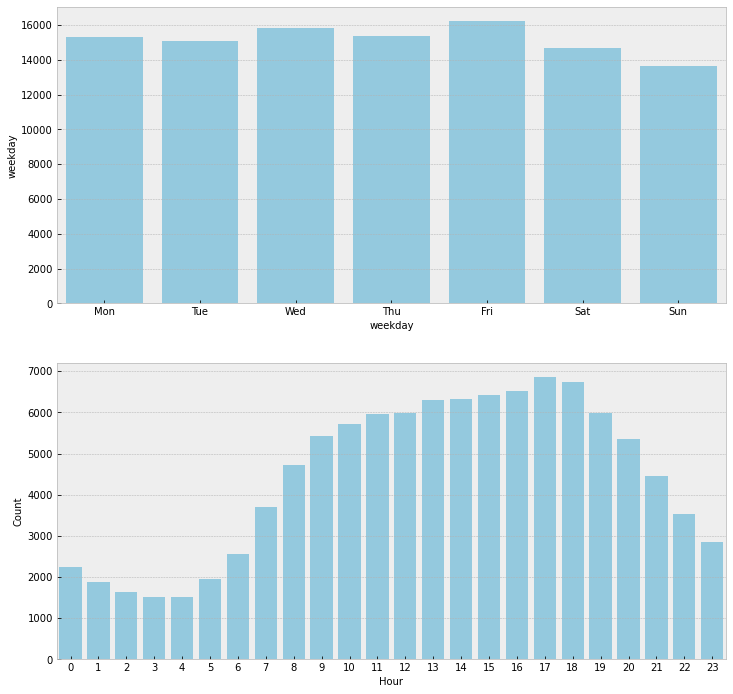

In [68]:
#time likely the accident happened
gs = plt.GridSpec(2,1)
plt.figure(figsize = (12,12))
plt.style.use('bmh')

ax = pl.subplot(gs[0,0])
sns.barplot(x = list(df_term3.groupby(['weekday'])['Date'].count().index), y = list(df_term3.groupby(['weekday'])['Date'].count().values),
data = pd.DataFrame(df_term3.groupby(['weekday'])['Date']), lw = 2, color = 'skyblue')
plt.xticks(list(df_term3.groupby(['weekday'])['Date'].count().index), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('weekday', fontsize = 10)
plt.ylabel('weekday', fontsize = 10)

ax = pl.subplot(gs[1,0])
sns.barplot(x = list(df_term3.groupby(['Hour'])['Date'].count().index), y = list(df_term3.groupby(['Hour'])['Date'].count().values),
data =  pd.DataFrame(df_term3.groupby(['Hour'])['Date']), lw = 2, color = 'skyblue')
plt.xlabel('Hour',fontsize = 10)
plt.ylabel('Count',fontsize = 10)

plt.show()

#### Analysis for March 2, 2018 -> date with highest number of calls

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663282 entries, 0 to 663521
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   lat          663282 non-null  float64       
 1   lng          663282 non-null  float64       
 2   desc         663282 non-null  object        
 3   zip          663282 non-null  object        
 4   title        663282 non-null  object        
 5   timeStamp    663282 non-null  datetime64[ns]
 6   twp          663282 non-null  object        
 7   addr         663282 non-null  object        
 8   e            663282 non-null  int64         
 9   reason       663282 non-null  object        
 10  Year         663282 non-null  int64         
 11  Month        663282 non-null  int64         
 12  Date         663282 non-null  object        
 13  Day of Week  663282 non-null  object        
 14  weekday      663282 non-null  int64         
 15  Hour         663282 non-null  int6

In [70]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [71]:
df_freq = df.loc[df['Date'] == '2018-03-02']
df_freq.head()

lat        lng  \
315303  40.133037 -75.408463   
315304  40.187728 -75.432977   
315305  40.119255 -75.236238   
315306  40.006301 -75.294010   
315307  40.087176 -75.376192   

                                                     desc      zip  \
315303  SHANNONDELL DR & SHANNONDELL BLVD;  LOWER PROV...  19403.0   
315304  NANCY LN & REBECCA DR;  LOWER PROVIDENCE; Stat...  19426.0   
315305  PENNSYLVANIA TPKE & JOSHUA RD OVERPASS; WHITEM...  19401.0   
315306  SCHOOL LN & SHELDON LN;  LOWER MERION; Station...  19003.0   
315307  KINGWOOD RD & FLINTLOCK RD;  UPPER MERION; Sta...  19406.0   

                              title           timeStamp               twp  \
315303             EMS: FALL VICTIM 2018-03-02 00:15:01  LOWER PROVIDENCE   
315304          EMS: CARDIAC ARREST 2018-03-02 00:17:11  LOWER PROVIDENCE   
315305  Traffic: VEHICLE ACCIDENT - 2018-03-02 00:20:04        WHITEMARSH   
315306          EMS: CARDIAC ARREST 2018-03-02 00:41:36      LOWER MERION   
315307         EMS: ABDOMINAL PAINS 2018-03-02 00:50:06      UPPER MERION   

                                          addr  e   reason  Year  Month  \
315303       SHANNONDELL DR & SHANNONDELL BLVD  1      EMS  2018      3   
315304                   NANCY LN & REBECCA DR  1      EMS  2018      3   
315305  PENNSYLVANIA TPKE & JOSHUA RD OVERPASS  1  Traffic  2018      3   
315306                  SCHOOL LN & SHELDON LN  1      EMS  2018      3   
315307              KINGWOOD RD & FLINTLOCK RD  1      EMS  2018      3   

             Date Day of Week  weekday  Hour                    geometry  
315303 2018-03-02         Fri        4     0  POINT (-75.40846 40.13304)  
315304 2018-03-02         Fri        4     0  POINT (-75.43298 40.18773)  
315305 2018-03-02         Fri        4     0  POINT (-75.23624 40.11925)  
315306 2018-03-02         Fri        4     0  POINT (-75.29401 40.00630)  
315307 2018-03-02         Fri        4     0  POINT (-75.37619 40.08718)

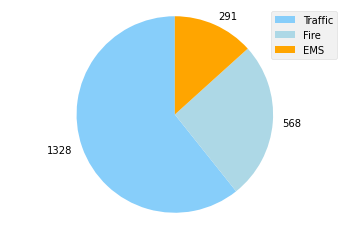

In [72]:
#the most common reason in that day
reason_freq = df_freq['reason'].value_counts()
percentage_freq = df_freq['reason'].value_counts()*100/df_freq['reason'].count()
rsn_freq = pd.concat([reason_freq,percentage_freq], keys = ['total', '%'], axis = 1)
rsn_freq

patches, text = plt.pie(rsn_freq.total,colors = colors, labels = rsn_freq['total'], startangle = 90)
plt.legend(patches, rsn_freq.index,  fontsize = 10, loc = 'best')
plt.axis('equal')

plt.show()

dominated by traffic in that day

<AxesSubplot:xlabel='total', ylabel='twp'>

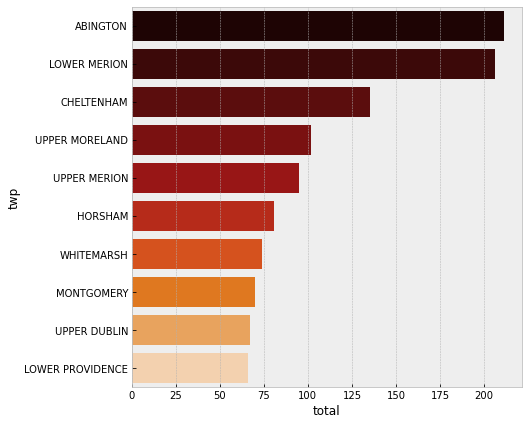

In [73]:
#top 10 township
df_freq_twp = df_freq.groupby(['twp'])['timeStamp'].count().sort_values(ascending = False).reset_index()
df_freq_twp.columns = ['twp', 'total']
df_freq_twp = df_freq_twp.sort_values(by = 'total', ascending = False).head(10)

plt.figure(figsize = (7,7))
sns.barplot(x = 'total', y = 'twp', data = df_freq_twp, orient = 'h', palette = 'gist_heat')